In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cwd= os.getcwd()
DATASET_PATH = os.path.join(cwd, 'split_dataset')
TRAINING_PATH = os.path.join(DATASET_PATH, 'train')
VALIDATION_PATH = os.path.join(DATASET_PATH, 'val')

In [3]:
def train_val_generators(TRAINING_PATH, VALIDATION_PATH):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range = 40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_PATH,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_PATH,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

    return train_generator, validation_generator

In [4]:
train_generator, validation_generator = train_val_generators(TRAINING_PATH, VALIDATION_PATH)

Found 2139 images belonging to 15 classes.
Found 542 images belonging to 15 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [19]:
optimizers = Adam(learning_rate=0.001)
model.compile(optimizer= optimizers,
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.72 and logs.get('val_accuracy')>0.72):
      self.model.stop_training = True

In [21]:
callbacks = myCallback()
history = model.fit(train_generator,
                    steps_per_epoch = 16,
                    epochs = 600,
                    verbose= 1,
                    batch_size=128,
                    validation_data = validation_generator,
                    validation_steps = 16,
                    callbacks = callbacks
                    )

Epoch 1/600
16/16 [==============================] - 70s 4s/step - loss: 2.7606 - accuracy: 0.0869 - val_loss: 2.6915 - val_accuracy: 0.0820
Epoch 2/600
16/16 [==============================] - 52s 3s/step - loss: 2.6632 - accuracy: 0.1094 - val_loss: 2.5742 - val_accuracy: 0.1895
Epoch 3/600
16/16 [==============================] - 68s 4s/step - loss: 2.5481 - accuracy: 0.1475 - val_loss: 2.3808 - val_accuracy: 0.2441
Epoch 4/600
16/16 [==============================] - 80s 5s/step - loss: 2.4328 - accuracy: 0.1982 - val_loss: 2.2243 - val_accuracy: 0.2461
Epoch 5/600
16/16 [==============================] - 66s 4s/step - loss: 2.3761 - accuracy: 0.2107 - val_loss: 2.1857 - val_accuracy: 0.2715
Epoch 6/600
16/16 [==============================] - 60s 4s/step - loss: 2.3071 - accuracy: 0.2383 - val_loss: 2.0814 - val_accuracy: 0.3066
Epoch 7/600
16/16 [==============================] - 57s 3s/step - loss: 2.2498 - accuracy: 0.2334 - val_loss: 2.0817 - val_accuracy: 0.2695
Epoch 8/600
1

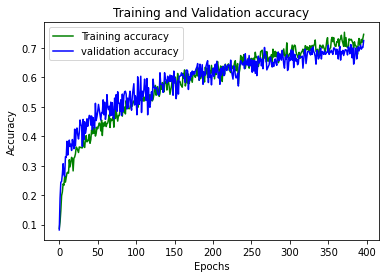

In [22]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(397)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

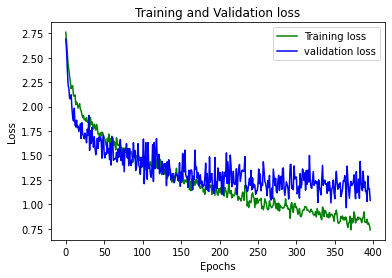

In [23]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(397)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model.evaluate(validation_generator)

17/17 [==============================] - 14s 835ms/step - loss: 1.0705 - accuracy: 0.7177


[1.070457100868225, 0.7177121639251709]

In [25]:
model.evaluate(train_generator)

34/34 [==============================] - 92s 3s/step - loss: 0.5410 - accuracy: 0.8181


[0.5410275459289551, 0.8181393146514893]

In [26]:
model.save('FOODRISM72ACC.model', save_format='h5')

In [17]:
import cv2

In [18]:
pred = model.predict(validation_generator)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

#for fn in uploaded.keys():
 
  # predicting images
path = os.path.join(cwd, 'rendang')
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
  print(fn + " ini adalah kertas")
else:
  print(fn + " ini adalah plastik")